In [59]:
# Importing the necessary modules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# We will need this later
import wordcloud

In [2]:
# A module to open URLs
from urllib.request import urlopen

# A module to extract data from html files
from bs4 import BeautifulSoup

# A module to download files
import requests

In [3]:
# Get the html of the page
url = "http://www.crockettlab.org/publications"
html = urlopen(url)

In [4]:
# Create a Beautiful Soup object from the html
# The Beautiful Soup package is used to parse the html: 
# Take the raw html text and break it into Python objects
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [5]:
# Get the title
title = soup.title
print(title)

<title>Publications — Crockett Lab</title>


In [6]:
# Print out the text
text = soup.get_text()
print(soup.text)








Publications — Crockett Lab













SQUARESPACE_ROLLUPS = {};
(function(rollups, name) { if (!rollups[name]) { rollups[name] = {}; } rollups[name].js = ["//assets.squarespace.com/universal/scripts-compressed/common-b8dc4afad46763f97b0a5-min.en-US.js"]; })(SQUARESPACE_ROLLUPS, 'squarespace-common');
Static = window.Static || {}; Static.SQUARESPACE_CONTEXT = {"facebookAppId":"314192535267336","facebookApiVersion":"v6.0","rollups":{"squarespace-announcement-bar":{"js":"//assets.squarespace.com/universal/scripts-compressed/announcement-bar-277f7307d5fec1421679c-min.en-US.js"},"squarespace-audio-player":{"css":"//assets.squarespace.com/universal/styles-compressed/audio-player-52bdd87acccf92a19703e60e09c654bd-min.css","js":"//assets.squarespace.com/universal/scripts-compressed/audio-player-a777451ae7710df146ff6-min.en-US.js"},"squarespace-blog-collection-list":{"css":"//assets.squarespace.com/universal/styles-compressed/blog-collection-list-d41d8cd98f00b204e9800998ecf8427e-min.cs

In [7]:
# You can use the find_all() method of soup to extract useful html tags within a webpage, e.g.:
# < a > for hyperlinks
# < table > for tables
# < tr > for table rows
# < th > for table headers
# < td > for table cells

soup.find_all('a')

[<a href="/research">Research</a>,
 <a href="/people">People</a>,
 <a href="/publications">Publications</a>,
 <a href="/news-1">Media</a>,
 <a href="/contact">Contact</a>,
 <a href="/">
             
               Crockett Lab
             
           </a>,
 <a href="/research">Research</a>,
 <a href="/people">People</a>,
 <a href="/publications">Publications</a>,
 <a href="/news-1">Media</a>,
 <a href="/contact">Contact</a>,
 <a>Menu</a>,
 <a href="https://www.nature.com/articles/s41562-018-0425-1" target="_blank">Link»</a>,
 <a href="/s/9rrttrrivmzlsqespjn3h72fy2g3xq" target="_blank">View PDF»</a>,
 <a href="/s/r9x2u9f41keg5s7pc9dwsykv9iv0ga" target="_blank">View commentary»</a>,
 <a href="https://www.ncbi.nlm.nih.gov/pubmed/28459442" target="_blank">PubMed link»</a>,
 <a href="/s/nn4557-t44w.pdf" target="_blank">View PDF»</a>,
 <a href="http://www.nature.com/articles/s41562-017-0213-3" target="_blank">Link»</a>,
 <a href="/s/Crockett_2017_NHB_Outrage.pdf" target="_blank">View PDF»<

In [8]:
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

/research
/people
/publications
/news-1
/contact
/
/research
/people
/publications
/news-1
/contact
None
https://www.nature.com/articles/s41562-018-0425-1
/s/9rrttrrivmzlsqespjn3h72fy2g3xq
/s/r9x2u9f41keg5s7pc9dwsykv9iv0ga
https://www.ncbi.nlm.nih.gov/pubmed/28459442
/s/nn4557-t44w.pdf
http://www.nature.com/articles/s41562-017-0213-3
/s/Crockett_2017_NHB_Outrage.pdf
http://www.ncbi.nlm.nih.gov/pubmed/27054685
https://www.dropbox.com/s/k9r1adym3243bbe/Everett_2016_JEPG.pdf?dl=0
http://www.ncbi.nlm.nih.gov/pubmed/25404350
https://www.dropbox.com/s/wsismdlei1spg10/Crockett_2014_PNAS.pdf?dl=0
http://www.ncbi.nlm.nih.gov/pubmed/23845564
https://www.dropbox.com/s/9cmhirgafvhreaz/Crockett_2013_TiCS.pdf?dl=0
https://www.sciencedirect.com/science/article/abs/pii/S1364661320301492
/s/1-s20-S1364661320301492-main.pdf
https://www.nature.com/articles/s41562-020-0884-z
/s/Using-social-and-behavioural-science-to-support-COVID-19-pandemic-response-NHB.pdf
https://authors.elsevier.com/a/1a%7EP78MqMicOp

In [9]:
i=0
for link in all_links:
    file = link.get("href")
    if str(file).startswith('/s/'):
        print(i, file)
        r = requests.get('http://www.crockettlab.org'+file, allow_redirects=True)
        open('crockettpubs/'+str(i)+'.pdf', 'wb').write(r.content)
        i+=1

0 /s/9rrttrrivmzlsqespjn3h72fy2g3xq
1 /s/r9x2u9f41keg5s7pc9dwsykv9iv0ga
2 /s/nn4557-t44w.pdf
3 /s/Crockett_2017_NHB_Outrage.pdf
4 /s/1-s20-S1364661320301492-main.pdf
5 /s/Using-social-and-behavioural-science-to-support-COVID-19-pandemic-response-NHB.pdf
6 /s/Chawla-Earp-Crockett-2020.pdf
7 /s/Carlson-et-al-2020.pdf
8 /s/Brady-Crockett-Van-Bavel-2020.pdf
9 /s/psychadelic-paper-PNAS-rcat.pdf
10 /s/How-Effective-Is-Online-Outrage.pdf
11 /s/How-Effective-Is-Online-Outrage.pdf
12 /s/How-Effective-Is-Online-Outrage.pdf
13 /s/s41467-018-07231-9.pdf
14 /s/1-s20-S2352250X18300034-main.pdf
15 /s/Crockett_Lockwood_2018
16 /s/Actions-Speak-Louder-Than-Outcomes-in-Judgments-of-Prosocial-Behaviour.pdf
17 /s/9rrttrrivmzlsqespjn3h72fy2g3xq
18 /s/r9x2u9f41keg5s7pc9dwsykv9iv0ga
19 /s/p3bjy4qm5ogzkpgps921si1q0svmeq
20 /s/9rrttrrivmzlsqespjn3h72fy2g3xq
21 /s/1-s20-S0022103117308181-main.pdf
22 /s/Kappes-Nussberger-et-al-2018.pdf
23 /s/Sex-differences-in-the-effects-of-acute-stress-on-behavior-in-the-ultim

In [29]:
all_titles = soup.find_all('strong')

print(all_titles)

[<strong>Beliefs about bad people are volatile</strong>, <strong>Moral transgressions corrupt neural representations of value</strong>, <strong>Moral outrage in the digital age</strong>, <strong>Inference of trustworthiness from intuitive moral judgments</strong>, <strong>Harm to others outweighs harm to self in moral decision making</strong>, <strong>Models of morality</strong>, <strong>A theory of moral praise<br/></strong>, <strong>Prosocial behaviour is associated with transdiagnostic markers of affective sensitivity in multiple domains<br/></strong>, <strong>Using social and behavioural science to support COVID-19 pandemic response<br/></strong>, <strong>A neuroeconomic model of gender disparities in moralistic punishment<br/></strong>, <strong>Motivated misremembering of selfish decisions<br/></strong>, <strong>The MAD Model of Moral Contagion: The role of motivation, attention and design in the spread of moralized content online<br/></strong>, <strong> <br/></strong>, <strong>Wh

In [30]:
type(all_titles[0])

bs4.element.Tag

In [32]:
titles = []
for title in soup.find_all('strong'):
    titles.append(str(title))
    
print(titles)

['<strong>Beliefs about bad people are volatile</strong>', '<strong>Moral transgressions corrupt neural representations of value</strong>', '<strong>Moral outrage in the digital age</strong>', '<strong>Inference of trustworthiness from intuitive moral judgments</strong>', '<strong>Harm to others outweighs harm to self in moral decision making</strong>', '<strong>Models of morality</strong>', '<strong>A theory of moral praise<br/></strong>', '<strong>Prosocial behaviour is associated with transdiagnostic markers of affective sensitivity in multiple domains<br/></strong>', '<strong>Using social and behavioural science to support COVID-19 pandemic response<br/></strong>', '<strong>A neuroeconomic model of gender disparities in moralistic punishment<br/></strong>', '<strong>Motivated misremembering of selfish decisions<br/></strong>', '<strong>The MAD Model of Moral Contagion: The role of motivation, attention and design in the spread of moralized content online<br/></strong>', '<strong> <

In [38]:
titles = []
for title in soup.find_all('strong'):
    title = str(title).replace('<strong>', '')
    title = title.replace('</strong>', '')
    title = title.replace('<br/>', '')
    titles.append(title)
    
print(titles)

['Beliefs about bad people are volatile', 'Moral transgressions corrupt neural representations of value', 'Moral outrage in the digital age', 'Inference of trustworthiness from intuitive moral judgments', 'Harm to others outweighs harm to self in moral decision making', 'Models of morality', 'A theory of moral praise', 'Prosocial behaviour is associated with transdiagnostic markers of affective sensitivity in multiple domains', 'Using social and behavioural science to support COVID-19 pandemic response', 'A neuroeconomic model of gender disparities in moralistic punishment', 'Motivated misremembering of selfish decisions', 'The MAD Model of Moral Contagion: The role of motivation, attention and design in the spread of moralized content online', ' ', 'Who are “we” and why are we cooperating? Insights from social psychology', 'Transformative experience and social connectedness mediate the mood-enhancing effects of psychedelic use in naturalistic settings', 'The effects of psychosocial st

In [48]:
all_words = ''

for title in titles: 
      
    # split the value 
    tokens = title.split() 
      
    all_words += " ".join(tokens)+" "
    
all_words[:10]

'Beliefs ab'

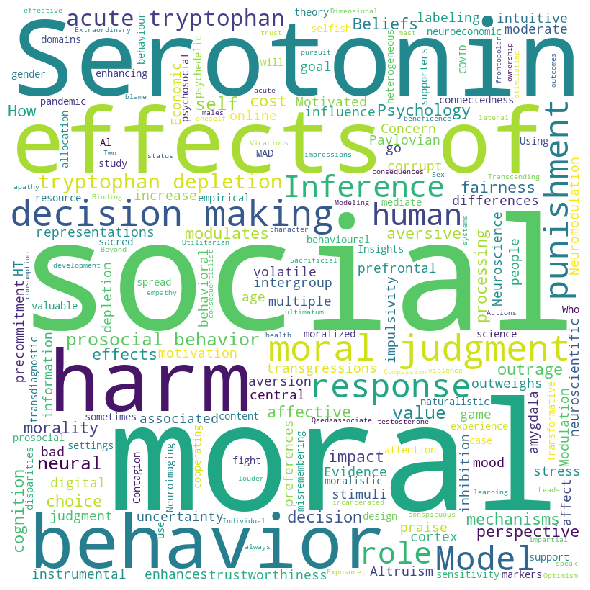

In [60]:
wordcloud = wordcloud.WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = wordcloud.STOPWORDS, 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 